Przydatne linki
* [osmnx-example](https://github.com/gboeing/osmnx-examples/tree/main/notebooks) - biblioteka do pobierania danych z OpenStreetMap, pozwala projektować, wizualizować i analizować sieco dróg i inne przestrzenne dane
* [geopandas-example](https://github.com/jorisvandenbossche/geopandas-tutorial) - biblioteka do analizy dancyh przestrzennych
* [esda](https://github.com/pysal/esda/) - biblioteka do exploratory spatial data analysis
* [pointpats](https://github.com/pysal/pointpats/) - biblioteka analizy wzorcow punktowych


In [35]:
import networkx as nx
import osmnx as ox

import matplotlib.pyplot as plt
from IPython.display import Image

import os
from pathlib import Path


%matplotlib inline
ox.__version__

'1.1.2'

In [27]:
DATA = "data"

# configure the inline image display
img_folder = 'images'
extension = 'png'
size = 240
dpi = 40

In [28]:
Path(DATA).mkdir(parents=True, exist_ok=True)
Path(img_folder).mkdir(parents=True, exist_ok=True)

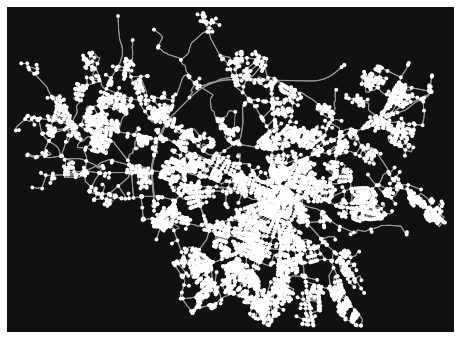

In [29]:


    # download/model a street network for some city then visualize it
    G = ox.graph_from_place("Wroclaw, Poland", network_type="drive")
fig, ax = ox.plot_graph(G)

In [ ]:
nx.write_gpickle(G, os.path.join(DATA, "drive_wroc.gpickle"))

# save street network as GeoPackage to work with in GIS
ox.save_graph_geopackage(G, filepath=os.path.join(DATA, "drive_network.gpkg"))

# save street network as GraphML file to work with later in OSMnx or networkx or gephi
ox.save_graphml(G, filepath=os.path.join(DATA, "drive_network.graphml"))

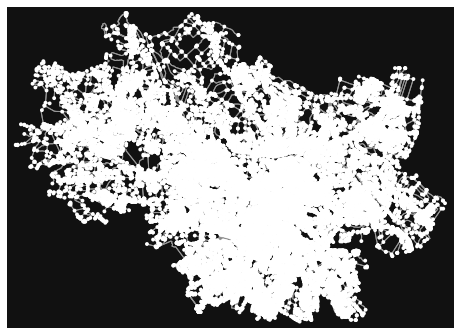

In [31]:
filename = os.path.join(DATA, "bike_network.graphml")
if os.path.isfile(filename):
    G_bike = ox.load_graphml(filepath=filename)
else:
    # download/model a street network for some city then visualize it
    G_bike = ox.graph_from_place("Wroclaw, Poland", network_type="bike")
fig, ax = ox.plot_graph(G_bike)

In [32]:
nx.write_gpickle(G_bike, os.path.join(DATA, "bike_wroc.gpickle"))

# save street network as GeoPackage to work with in GIS
ox.save_graph_geopackage(G_bike, filepath=os.path.join(DATA, "bike_network.gpkg"))

# save street network as GraphML file to work with later in OSMnx or networkx or gephi
ox.save_graphml(G_bike, filepath=os.path.join(DATA, "bike_network.graphml"))

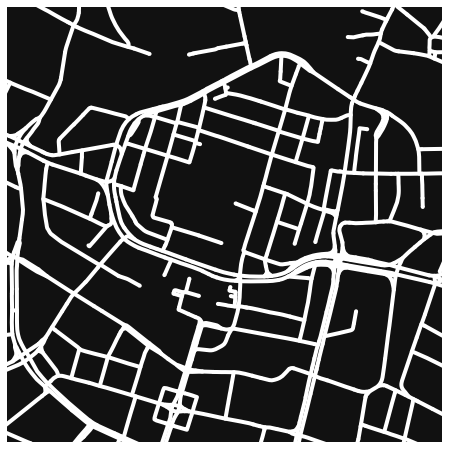

FileNotFoundError: No such file or directory: 'images/Wroclaw, Poland.png'

FileNotFoundError: No such file or directory: 'images/Wroclaw, Poland.png'

<IPython.core.display.Image object>

In [33]:
place = "Wroclaw, Poland"
fig, ax = ox.plot_figure_ground(address=place,  network_type="drive", dpi=dpi)
Image('{}/{}.{}'.format(img_folder, place, extension), height=size, width=size)

In [8]:
basic_stats = ox.basic_stats(G)
basic_stats

{'n': 6999,
 'm': 16616,
 'k_avg': 4.748106872410344,
 'edge_length_total': 2354461.5819999957,
 'edge_length_avg': 141.69845823302816,
 'streets_per_node_avg': 2.7881125875125017,
 'streets_per_node_counts': {0: 0,
  1: 1197,
  2: 111,
  3: 4714,
  4: 935,
  5: 39,
  6: 3},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.1710244320617231,
  2: 0.015859408486926702,
  3: 0.673524789255608,
  4: 0.13359051293041863,
  5: 0.005572224603514788,
  6: 0.0004286326618088298},
 'intersection_count': 5802,
 'street_length_total': 1352869.564999995,
 'street_segment_count': 9735,
 'street_length_avg': 138.96965228556704,
 'circuity_avg': 1.0499117847676238,
 'self_loop_proportion': 0.0026707755521314844}

In [18]:
#  Dluuuugo się robi
extended_stats = ox.extended_stats(G, bc=True)
extended_stats

{'avg_neighbor_degree': {95584835: 1.5,
  95584841: 2.0,
  95584850: 2.5,
  95584852: 2.0,
  95584855: 2.0,
  145728058: 3.0,
  145728072: 3.3333333333333335,
  145728079: 3.0,
  145728087: 3.0,
  145728088: 3.6666666666666665,
  145728095: 3.0,
  145728105: 3.0,
  145728118: 3.3333333333333335,
  145728119: 2.5,
  145728120: 3.6666666666666665,
  146925232: 2.6666666666666665,
  146925306: 2.6666666666666665,
  148811399: 3.0,
  148811414: 3.0,
  149251038: 2.3333333333333335,
  149251048: 3.0,
  149251055: 3.0,
  149251075: 2.6666666666666665,
  149251081: 3.0,
  149324024: 2.6666666666666665,
  149324033: 3.0,
  149324055: 2.0,
  149387927: 3.0,
  149387933: 2.5,
  149387940: 1.5,
  149387962: 3.0,
  149387980: 2.6666666666666665,
  149387993: 3.0,
  150597406: 3.0,
  150597414: 2.0,
  150597419: 2.5,
  150597420: 1.5,
  150597421: 2.0,
  150597422: 1.5,
  150597424: 2.0,
  150597432: 2.0,
  151024787: 1.5,
  151024790: 2.0,
  151024791: 2.5,
  151024793: 3.0,
  151024797: 2.5,
  15

In [36]:
# the node degree distribution for this graph has many false cul-de-sacs
degrees = dict(G.degree())
{n: list(degrees.values()).count(n) for n in range(max(degrees.values()) + 1)}

{0: 0,
 1: 15,
 2: 1200,
 3: 855,
 4: 907,
 5: 453,
 6: 3063,
 7: 75,
 8: 427,
 9: 0,
 10: 4}

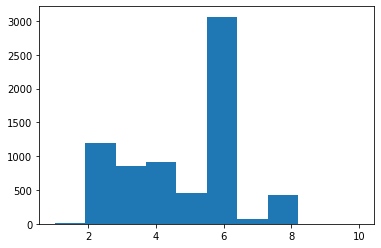

In [38]:
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees)
plt.show()